<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 162.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 178.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 135.0 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-22 12:14:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.8MB/s    in 2.3s    

2025-06-22 12:14:16 (66.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



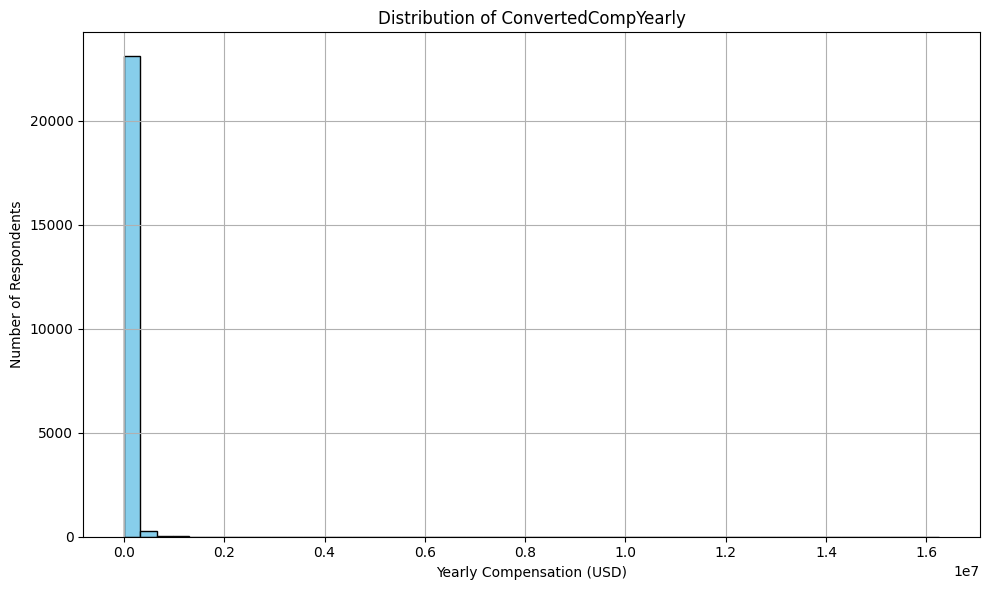

In [4]:
## Write your code here

# Drop missing values in ConvertedCompYearly
comp_data = df['ConvertedCompYearly'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



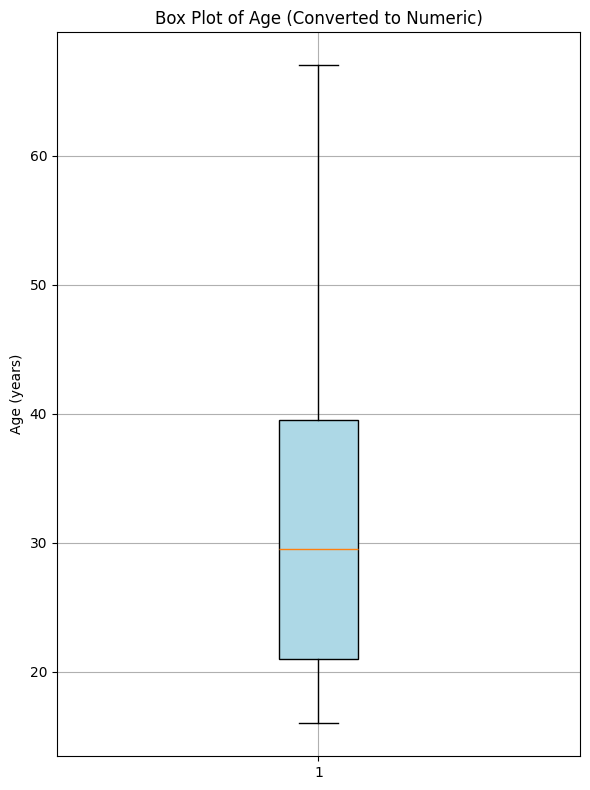

In [5]:
## Write your code here

# Step 1: Map Age categories to numeric values (midpoints)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Drop missing numeric age values
age_data = df['AgeNumeric'].dropna()

# Step 2: Plot the box plot
plt.figure(figsize=(6, 8))
plt.boxplot(age_data, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Age (years)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



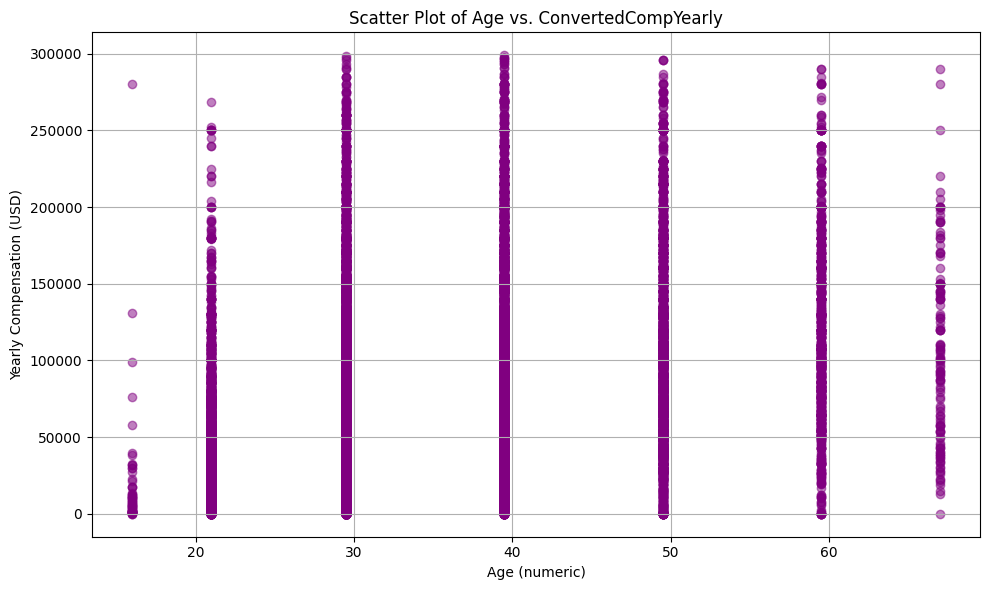

In [6]:
## Write your code here
# Convert Age to numeric
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Drop missing values in either column
df_filtered = df[['Age_numeric', 'ConvertedCompYearly']].dropna()

# Optional: Filter out extreme compensation outliers for clearer plot
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 300000]

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age_numeric'], df_filtered['ConvertedCompYearly'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Age vs. ConvertedCompYearly')
plt.xlabel('Age (numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


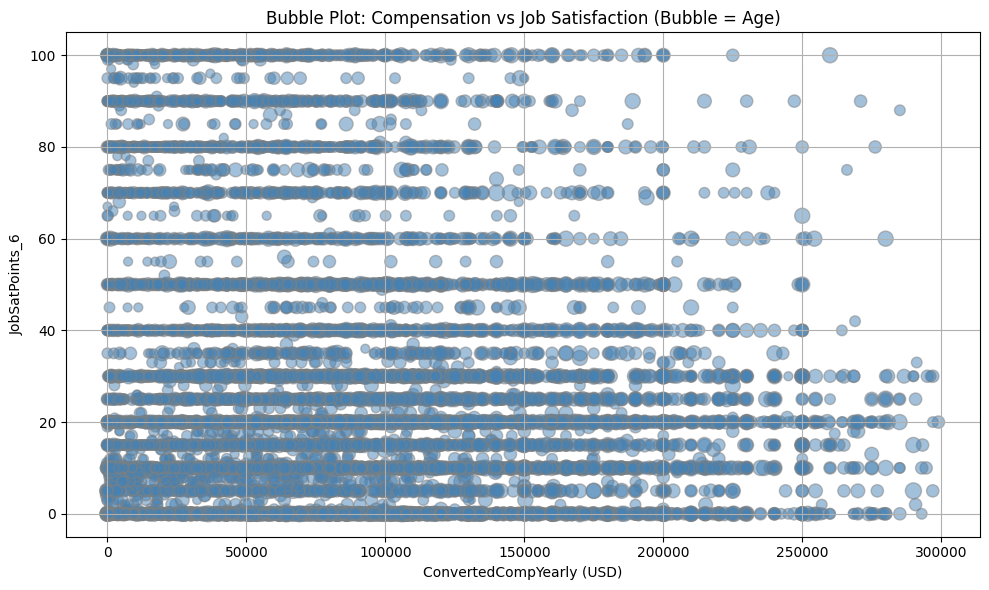

In [7]:
## Write your code here

# Map Age to numeric values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['Age_numeric'] = df['Age'].map(age_map)

# Drop missing values for all relevant columns
df_filtered = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()

# Optional: Remove extreme compensation outliers for better visualization
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 300000]

# Plot Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(
    df_filtered['ConvertedCompYearly'],
    df_filtered['JobSatPoints_6'],
    s=df_filtered['Age_numeric'] * 2,  # Bubble size
    alpha=0.5,
    color='steelblue',
    edgecolors='gray'
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble = Age)')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('JobSatPoints_6')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



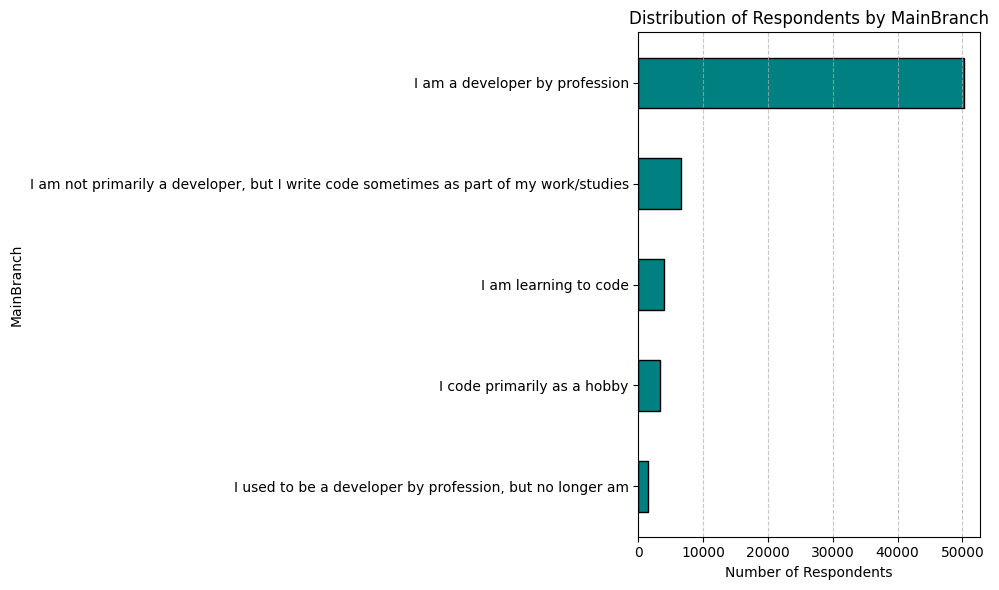

In [6]:
## Write your code here

# Count values in MainBranch, drop missing
main_branch_counts = df['MainBranch'].value_counts().dropna()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Distribution of Respondents by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.gca().invert_yaxis()  # To show the largest category on top
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



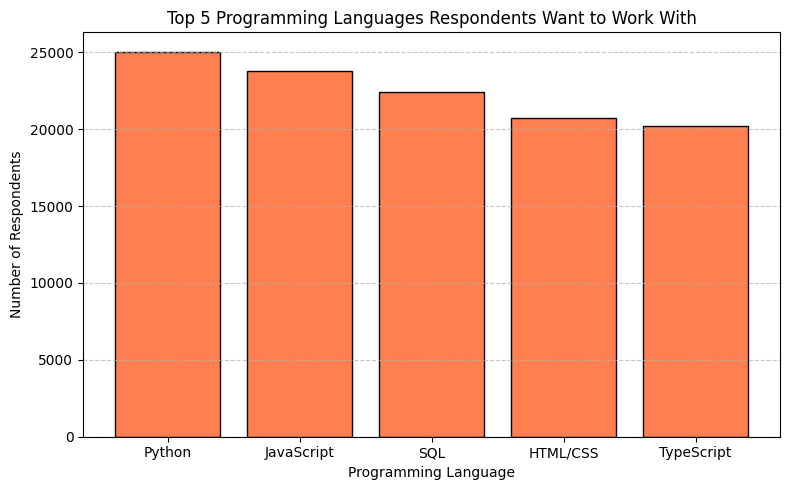

In [7]:
## Write your code here
from collections import Counter

# Load dataset
df = pd.read_csv('survey-data.csv')

# Drop missing entries
langs_raw = df['LanguageWantToWorkWith'].dropna()

# Split and flatten all language lists
all_langs = []
for row in langs_raw:
    all_langs.extend([lang.strip() for lang in row.split(';')])

# Count the top 5 languages
lang_counts = Counter(all_langs)
top_5 = lang_counts.most_common(5)

# Separate into labels and values for plotting
languages, counts = zip(*top_5)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
plt.bar(languages, counts, color='coral', edgecolor='black')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


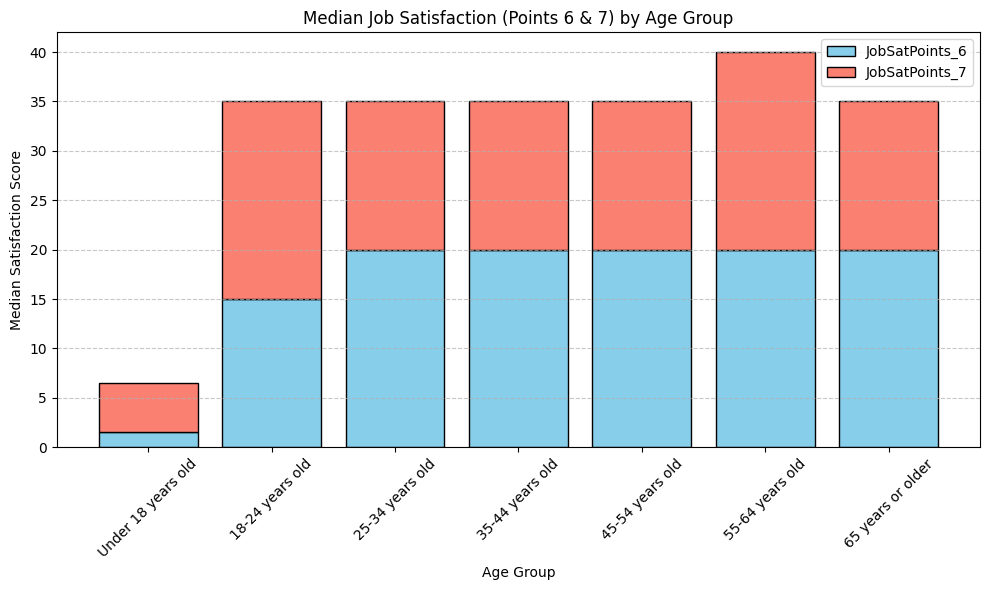

In [8]:
## Write your code here

# Define an ordered list of age groups for consistent sorting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter necessary columns and drop missing values
df_filtered = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()
df_filtered = df_filtered[df_filtered['Age'].isin(age_order)]

# Group by Age and calculate median
median_satisfaction = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().loc[age_order]  # Reorder explicitly

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
bottom = median_satisfaction['JobSatPoints_6']
plt.bar(median_satisfaction.index, bottom, label='JobSatPoints_6', color='skyblue', edgecolor='black')
plt.bar(median_satisfaction.index, median_satisfaction['JobSatPoints_7'],
        bottom=bottom, label='JobSatPoints_7', color='salmon', edgecolor='black')

plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



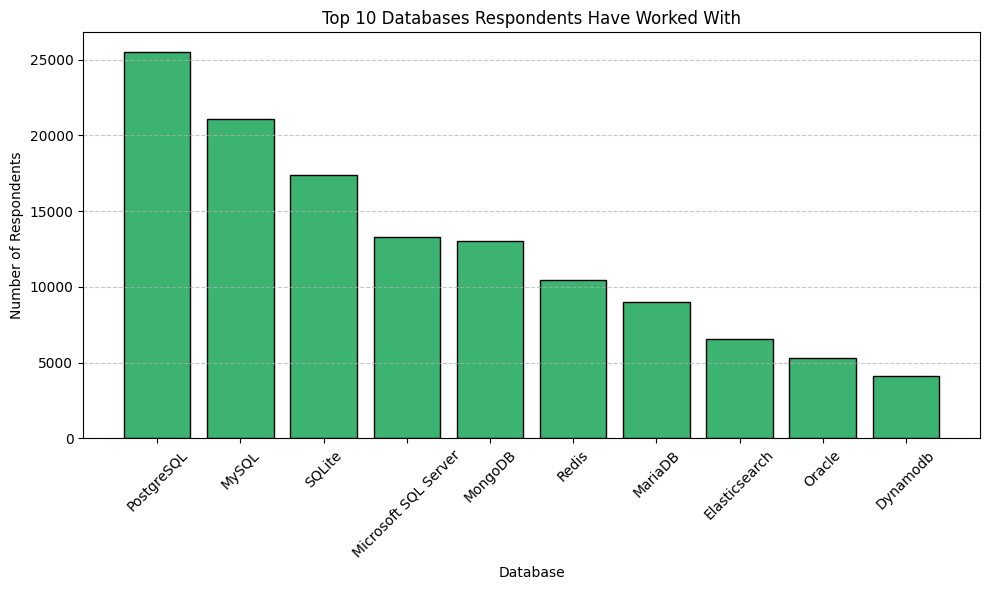

In [9]:
## Write your code here
from collections import Counter

# Load dataset
df = pd.read_csv('survey-data.csv')

# Drop NaNs from the column
db_series = df['DatabaseHaveWorkedWith'].dropna()

# Split and flatten the list of databases
all_dbs = []
for entry in db_series:
    all_dbs.extend([db.strip() for db in entry.split(';')])

# Count frequency of each database
db_counts = Counter(all_dbs)

# Get the top 10 most common databases
top_dbs = db_counts.most_common(10)
db_names, db_freqs = zip(*top_dbs)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(db_names, db_freqs, color='mediumseagreen', edgecolor='black')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



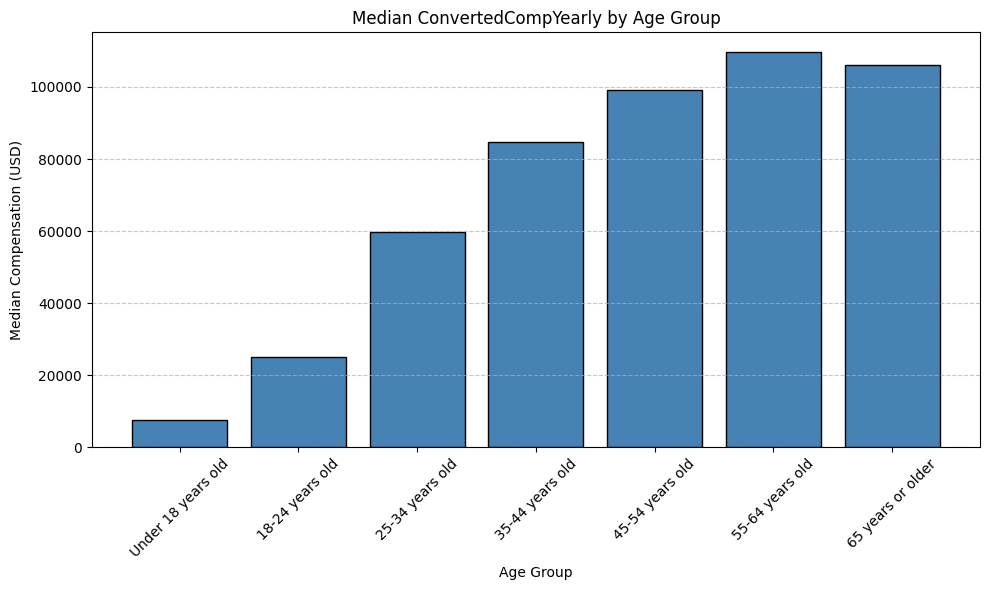

In [10]:
## Write your code here

# Clean and define ordered age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter out rows with missing values
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()
df_filtered = df_filtered[df_filtered['Age'].isin(age_order)]

# Calculate median compensation by age group
median_comp = df_filtered.groupby('Age')['ConvertedCompYearly'].median().loc[age_order]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_comp.index, median_comp.values, color='steelblue', edgecolor='black')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



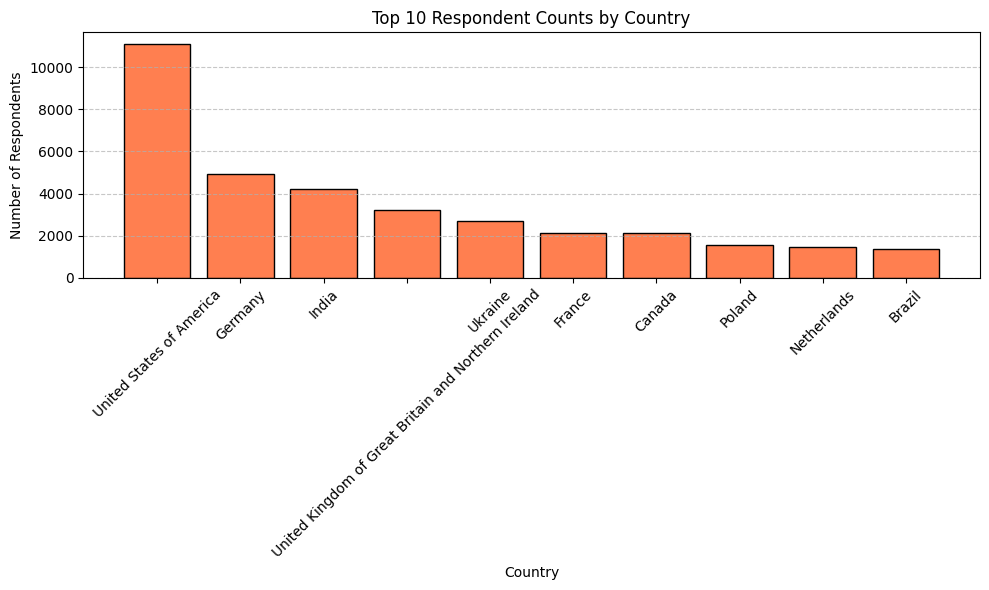

In [11]:
## Write your code here

# Count respondents by country
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='coral', edgecolor='black')
plt.title('Top 10 Respondent Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
